In [39]:
#### Import python modules, machine learning models, and user-defined .py modules
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.impute import SimpleImputer

import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import graphviz
from graphviz import Graph

import acquire
import prepare

# Wrangle

## Acquire

In [2]:
df = acquire.get_telco_data()

## Prepare

In [3]:
df = prepare.prep_telco(df)

## Split

In [4]:
train, validate, test = prepare.split_telco(df)

In [5]:
train

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn
6096,3,3,3,0,70,19.45,1303.50,0,1,0,...,1,0,1,0,1,0,0,0,0,0
1603,2,1,1,0,15,69.50,1071.40,1,1,1,...,0,1,0,1,0,1,0,1,1,0
5350,1,2,1,1,52,109.10,5647.95,0,1,0,...,0,1,0,1,0,0,1,1,1,0
2068,1,1,1,0,39,40.60,1494.50,1,0,0,...,0,0,0,0,0,1,0,1,1,0
6366,2,3,2,0,32,19.30,593.20,0,1,0,...,1,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,3,1,3,0,71,89.90,6342.70,0,1,1,...,0,1,0,1,0,1,1,1,0,0
4200,3,2,1,1,16,71.80,1167.80,1,1,0,...,0,0,0,0,0,0,0,0,1,1
3012,1,2,2,0,40,80.80,3132.75,1,1,0,...,0,1,0,1,0,0,0,0,0,0
763,3,1,2,0,11,53.80,651.55,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Explore

## Question

- Are customers with fiber more or less likely to churn?
- Do customers who churn have a higher average monthly spend than those who don't?
- Are customers with dependents less likely to churn than those who don't?
- Are seniors less likely to churn?

## Visualizations

In [6]:
### Create df for churned customers, for ease of use in focusing on churned customers
churned = train[train.churn == 1]
###
internet = pd.DataFrame(churned.internet_service_type_id.value_counts())
internet = internet.reset_index()
internet.rename(columns={'index':'internet_service', 'internet_service_type_id':'count'},inplace = True)

dependents = pd.DataFrame(churned.dependents_Yes.value_counts())
dependents = dependents.reset_index()
dependents.rename(columns = {'index':'has_dependents','dependents_Yes':'count'}, inplace = True)

seniors = pd.DataFrame(churned.senior_citizen.value_counts())
seniors = seniors.reset_index()
seniors.rename(columns = {'index':'senior_citizen','senior_citizen':'count'}, inplace = True)

### Are customers with fiber more or less likely to churn? Yes

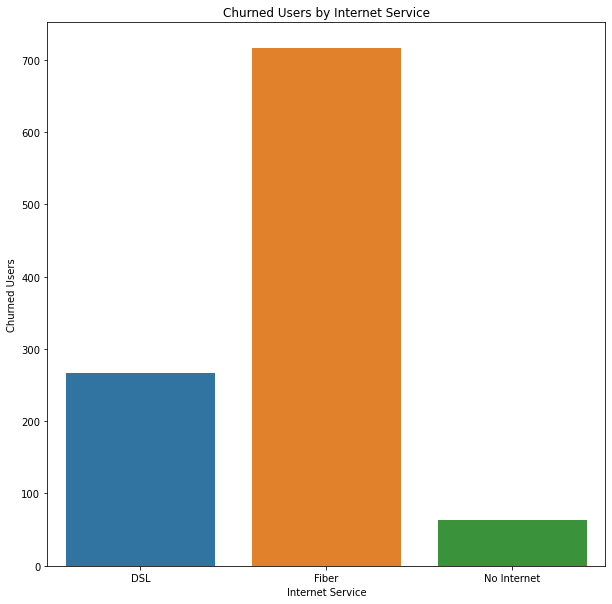

In [7]:
plt.figure(figsize = (10,10))
sns.barplot(data = internet, y = 'count',x = internet.internet_service)
plt.title('Churned Users by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Churned Users')
plt.xticks([0,1,2], ['DSL','Fiber','No Internet']);

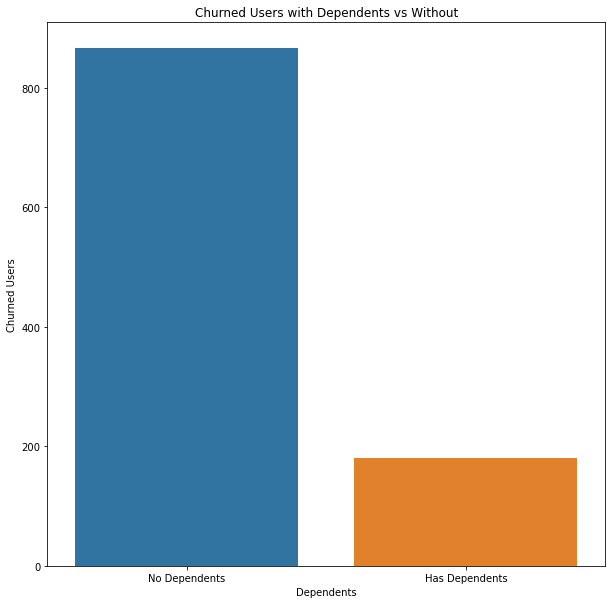

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(data = dependents, x = dependents.has_dependents, y = 'count')
plt.title('Churned Users with Dependents vs Without')
plt.xlabel('Dependents')
plt.ylabel('Churned Users')
plt.xticks(ticks = [0,1], labels = ['No Dependents','Has Dependents']);

### Are seniors less likely to churn?

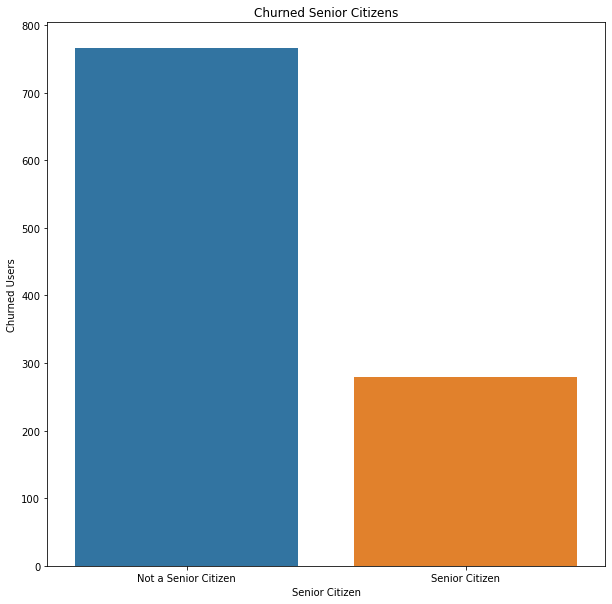

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(data = seniors, x = 'senior_citizen', y = 'count')
plt.title('Churned Senior Citizens')
plt.xlabel('Senior Citizen')
plt.ylabel('Churned Users')
plt.xticks(ticks = [0,1], labels = ['Not a Senior Citizen','Senior Citizen']);

## Statistical Tests

In [10]:
alpha = 0.5

### Are customers with fiber more or less likely to churn?

- $H_0$: There is no association between 
- $H_a$: There is an association between

In [11]:
observe = pd.crosstab(train.churn, train.internet_service_type_id)

In [12]:
chi2, p, degf, expected = stats.chi2_contingency(observe)

In [13]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1102  982  807]
 [ 266  716   64]]
---
Expected

[[1004 1246  639]
 [ 363  451  231]]
---

chi^2 = 412.2908
p     = 0.0000


In [14]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


### Do customers who churn have a higher average monthly spend than those who don't?

In [15]:
# Answer by comparing averages
train.groupby(train.churn).monthly_charges.mean()

churn
0    60.764182
1    73.662428
Name: monthly_charges, dtype: float64

#### Does monthly_charges correlate with churn?
- $H_0$: There is no association between monthly charges and churn 
- $H_a$: There is an association between monthly charges and churn

In [16]:
observe = pd.crosstab(train.churn, train.monthly_charges)

In [17]:
chi2, p, degf, expected = stats.chi2_contingency(observe)

In [18]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1 1 4 ... 1 1 1]
 [0 0 0 ... 0 0 0]]
---
Expected

[[0 0 2 ... 0 0 0]
 [0 0 1 ... 0 0 0]]
---

chi^2 = 1656.6070
p     = 0.0000


In [19]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


### Are customers with dependents less likely to churn than those who don't?
- $H_0$: There is no association between 
- $H_a$: There is an association between

In [20]:
observe = pd.crosstab(train.churn, train.dependents_Yes)

In [21]:
chi2, p, degf, expected = stats.chi2_contingency(observe)

In [22]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1898  993]
 [ 866  180]]
---
Expected

[[2029  861]
 [ 734  311]]
---

chi^2 = 107.0541
p     = 0.0000


In [23]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


### Are seniors less likely to churn?
- $H_0$: There is no association between 
- $H_a$: There is an association between

In [24]:
observe = pd.crosstab(train.churn, train.senior_citizen)

In [25]:
chi2, p, degf, expected = stats.chi2_contingency(observe)

In [26]:
print('Observed\n')
print(observe.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2524  367]
 [ 766  280]]
---
Expected

[[2415  475]
 [ 874  171]]
---

chi^2 = 109.7635
p     = 0.0000


In [27]:
if p < alpha:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis/")

We reject the null hypothesis.


## Summary

# Model

## Evaluate Baseline

In [36]:
# establish baseline
train['baseline'] = train.churn.value_counts().idxmax()

In [38]:
pd.crosstab(train.churn, train.baseline)

baseline,0
churn,
0,2891
1,1046


In [40]:
accuracy_score(train.churn, train.baseline)

0.7343154686309372

In [41]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

## Decision Tree

In [52]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [44]:
clf = clf.fit(X_train, y_train)

In [47]:
y_pred = clf.predict(X_train)

In [48]:
y_pred_proba = clf.predict_proba(X_train)

In [49]:
y_train.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [50]:
labels = sorted(y_train.unique())
pd.DataFrame(sklearn.metrics.confusion_matrix(y_train,y_pred), index=labels, columns = labels)

,0,1
0,2737,154
1,683,363


In [51]:
print(sklearn.metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      2891
           1       0.70      0.35      0.46      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.65      0.67      3937
weighted avg       0.77      0.79      0.76      3937



## Random Forest

In [56]:
rf = RandomForestClassifier(random_state=123)

In [57]:
rf = rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [58]:
y_pred = rf.predict(X_train)

In [59]:
y_pred_proba = rf.predict_proba(X_train)

In [60]:
rf.score(X_train, y_train)

0.9979679959359918

In [61]:
print(sklearn.metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2891
           1       1.00      0.99      1.00      1046

    accuracy                           1.00      3937
   macro avg       1.00      1.00      1.00      3937
weighted avg       1.00      1.00      1.00      3937



In [62]:
pd.DataFrame(sklearn.metrics.confusion_matrix(y_train,y_pred))

,0,1
0,2889,2
1,6,1040


## Logistic Regression

In [63]:
logit = LogisticRegression(random_state = 123)

In [64]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges,total_charges,gender_Male,partner_Yes,dependents_Yes,...,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn,baseline
6096,3,3,3,0,70,19.45,1303.50,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1603,2,1,1,0,15,69.50,1071.40,1,1,1,...,1,0,1,0,1,0,1,1,0,0
5350,1,2,1,1,52,109.10,5647.95,0,1,0,...,1,0,1,0,0,1,1,1,0,0
2068,1,1,1,0,39,40.60,1494.50,1,0,0,...,0,0,0,0,1,0,1,1,0,0
6366,2,3,2,0,32,19.30,593.20,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [66]:
features = ['monthly_charges','internet_service_type_id']

In [69]:
logit = logit.fit(X_train[features], y_train)

In [70]:
y_pred = logit.predict(X_train[features])

In [71]:
logit.score(X_train[features], y_train)

0.7343154686309372

In [72]:
features = ['monthly_charges','internet_service_type_id', 'senior_citizen']
logit = logit.fit(X_train[features], y_train)
y_pred = logit.predict(X_train[features])
logit.score(X_train[features], y_train)

0.7213614427228855

In [73]:
features = ['monthly_charges','internet_service_type_id', 'senior_citizen', 'dependents_Yes']
logit = logit.fit(X_train[features], y_train)
y_pred = logit.predict(X_train[features])
logit.score(X_train[features], y_train)

0.7233934467868935